In [1]:
from pylab import*
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import*
from scipy import special
from def_crs import*
from model_fct import*
from g_funct import*
from FBT import FBT 
from model_fct import*
from def_conv_crs_1h import*
from def_conv_crs_2h import*

import pandas as pd
import sys 


/home/marco/Documenti/SIDIS_epem/def_convolution_v3.1_survey_PV17_charm
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/NNFF10_PIp_lo/NNFF10_PIp_lo_0000.dat
NNFF10_PIp_lo PDF set, member #0, version 1; LHAPDF ID = 2000200
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/NNFF10_PIm_lo/NNFF10_PIm_lo_0000.dat
NNFF10_PIm_lo PDF set, member #0, version 1; LHAPDF ID = 2000000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/NNFF10_KAp_lo/NNFF10_KAp_lo_0000.dat
NNFF10_KAp_lo PDF set, member #0, version 1; LHAPDF ID = 2002000
LHAPDF 6.4.0 loading /home/marco/local/share/LHAPDF/NNFF10_KAm_lo/NNFF10_KAm_lo_0000.dat
NNFF10_KAm_lo PDF set, member #0, version 1; LHAPDF ID = 2001800


In [6]:
dati_lp1=pd.read_csv('fit_parameters/bands_/dati_lp_su_charm_no_no_scale_10.58_def.csv')
dati_lk1=pd.read_csv('fit_parameters/bands_/dati_lk_su_charm_no_no_scale_10.58_def.csv')
#
dati_lp2=pd.read_csv('fit_parameters/bands_/dati_lp_su_charm_no_yes_scale_10.58_def.csv')
dati_lk2=pd.read_csv('fit_parameters/bands_/dati_lk_su_charm_no_yes_scale_10.58_def.csv')
#
dati_lp3=pd.read_csv('fit_parameters/bands_/dati_lp_su_charm_yes_yes_scale_10.58_def.csv')
dati_lk3=pd.read_csv('fit_parameters/bands_/dati_lk_su_charm_yes_yes_scale_10.58_def.csv')
#
dati_exp=pd.read_csv("exp_data/lambda_had_global.dat", delimiter=r"\s+", header=0, engine='python')


In [2]:
y_lbl=50
x_lbl =50

ers_bar = 1.3  # dimensione barre errore
pnt_dat = 6 # dimensione punti
title_s=35 #dimensione titolo bin
fit_l=2.  # dimensione linea fit

z1=[0.25,.35,.45,.6]
lim=[-0.15,0.15]
ct=1
z_err =[[0.05,0.05,0.05,0.1],[0.05,0.05,0.05,0.3]]


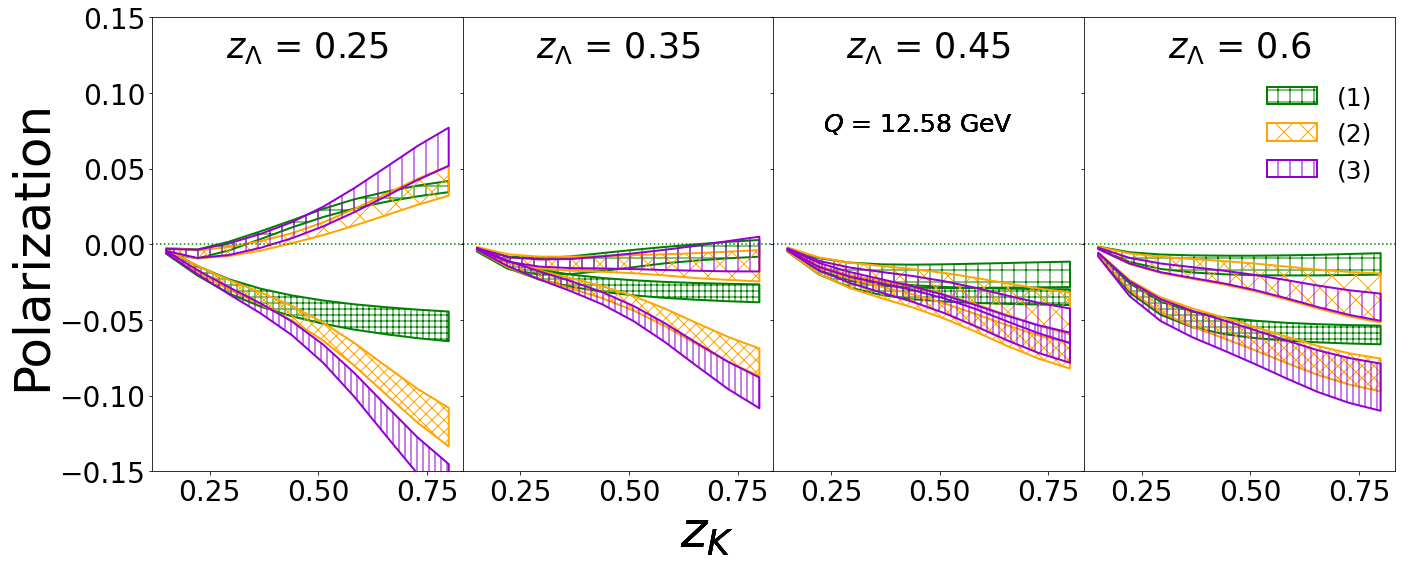

In [5]:
scale=12.58
z1=[0.25,0.35,0.45,0.6]
dati_lk1=pd.read_csv('fit_parameters/bands_/dati_lk_su_charm_no_no_scale_'+str(scale)+'_def.csv')
#
dati_lk2=pd.read_csv('fit_parameters/bands_/dati_lk_su_charm_no_yes_scale_'+str(scale)+'_def.csv')
#
dati_lk3=pd.read_csv('fit_parameters/bands_/dati_lk_su_charm_yes_yes_scale_'+str(scale)+'_def.csv')


ct=1
fig, axes = plt.subplots(1,4)
for zs,ax in zip(z1,axes):

    #fig.suptitle('$\Lambda$ - $\pi^+$ -- coef = '+str(coef)+' $\chi^2_{dof}$ = '+str(chi),fontsize=30)	
    dt1 = dati_lk1.loc[(dati_lk1['had1']==300) & (dati_lk1['z1']==zs)& (dati_lk1['had2']==200)]
    dt12 = dati_lk1.loc[(dati_lk1['had1']==300) & (dati_lk1['z1']==zs)& (dati_lk1['had2']==205)]

    dt2 = dati_lk2.loc[(dati_lk2['had1']==300) & (dati_lk2['z1']==zs)& (dati_lk2['had2']==200)]
    dt22 = dati_lk2.loc[(dati_lk2['had1']==300) & (dati_lk2['z1']==zs)& (dati_lk2['had2']==205)]

    dt3 = dati_lk3.loc[(dati_lk3['had1']==300) & (dati_lk3['z1']==zs)& (dati_lk3['had2']==200)]
    dt32 = dati_lk3.loc[(dati_lk3['had1']==300) & (dati_lk3['z1']==zs)& (dati_lk3['had2']==205)]

    #pnt = dati_exp.loc[(dati_exp['h1']==300) & (dati_exp['z1']==zs)& (dati_exp['h2']==200)]	
    #pnt_white = undati_exp.loc[(undati_exp['h1']==300) & (undati_exp['z1']==zs)& (undati_exp['h2']==100)]	
    #pnt2 = dati_exp.loc[(dati_exp['h1']==300) & (dati_exp['z1']==zs)& (dati_exp['h2']==205)]	


    ax=plt.subplot(1,len(z1),ct)
    ### new fit lines
    #ax.plot(dt12.z2,dt12.conv,label='_(1) $\Lambda$ $K^-$ ',linewidth=fit_l,color='red')
    #ax.plot(dt1.z2,dt1.conv,label='_(1) $\Lambda$ $K^+$ ',linewidth=fit_l,linestyle='-.',color='red')
    ax.fill_between(dt12.z2,dt12.maxx,dt12.mins,label='(1)',linewidth=fit_l,color="none",hatch="+",edgecolor="green", alpha=1)
    ax.fill_between(dt1.z2,dt1.maxx,dt1.mins,color="none",linewidth=fit_l,hatch="++",edgecolor="green", alpha=1)

    
    #ax.plot(dt22.z2,dt22.conv,label='_(2) $\Lambda$ $K^-$ ',linewidth=fit_l,color='orange')
    #ax.plot(dt2.z2,dt2.conv,label='_(2) $\Lambda$ $K^+$ ',linewidth=fit_l,linestyle='-.',color='orange')
    ax.fill_between(dt12.z2,dt22.maxx,dt22.mins,label='(2)',linewidth=fit_l,color="none",hatch="x",edgecolor="orange", alpha=1)
    ax.fill_between(dt1.z2,dt2.maxx,dt2.mins,linewidth=fit_l,color="none",hatch="xx",edgecolor="orange", alpha=1)
    
    #ax.plot(dt12.z2,dt32.conv,label='_(3) $\Lambda$ $K^-$ ',linewidth=fit_l,color='brown')
    #ax.plot(dt1.z2,dt3.conv,label='_(3) $\Lambda$ $K^+$ ',linewidth=fit_l,linestyle='-.',color='brown')
    ax.fill_between(dt12.z2,dt32.maxx,dt32.mins,label='(3)',linewidth=fit_l,color="none",hatch="|",edgecolor="darkviolet", alpha=1)
    ax.fill_between(dt1.z2,dt3.maxx,dt3.mins,linewidth=fit_l,color="none",hatch="||",edgecolor="darkviolet", alpha=1)

    axhline(linewidth=1.5, ls=':', color='g')
    ### experimental points with error bars
    if zs == 0.25: title("$z_{\Lambda}$ = "+str(zs),fontsize=title_s,x=0.5, y=.9)
    if zs == 0.35: title("$z_{\Lambda}$ = "+str(zs),fontsize=title_s,x=0.5, y=.9)
    if zs == 0.45: title("$z_{\Lambda}$ = "+str(zs),fontsize=title_s,x=0.5, y=.9)
    if zs == 0.6: title("$z_{\Lambda}$ = "+str(zs),fontsize=title_s,x=0.5, y=.9)

    ax.tick_params(axis='both', which='major', labelsize=28)
    if ct >1: ax.set_yticklabels([])

    if ct ==len(z1) :legend(loc='upper right',bbox_to_anchor=(1.,0.9), fontsize=25,frameon=False), 
    if ct==1:ylabel('Polarization',size=y_lbl) 
    ax.set_ylim(lim)
    ct+=1
    fig.text(0.5, 0.1, r'$z_{K}$', ha='center',size=x_lbl)
    #fig.text(0.15, 0.25, '(c)', ha='center',size=x_lbl)
    fig.text(0.65, 0.65, '$Q$ = '+str(scale)+' GeV', ha='center',size=25)

fig.subplots_adjust(top=0.8,bottom=0.2,left=0.105,right=0.99,hspace=0.2,wspace=0.0)
fig.set_size_inches(19.5, 10.5, forward=True)
#fig.savefig('Lb_k.pdf')
#fig.savefig('Lb_k.png')
#fig.savefig('plot_scale/Lb_k_scale_'+str(scale)+'.png')
#fig.savefig('plot_draft/Lb_k_scale_'+str(scale)+'_2.pdf')
#fig.savefig('plot_draft/Lb_k_scale_'+str(scale)+'_2.png')

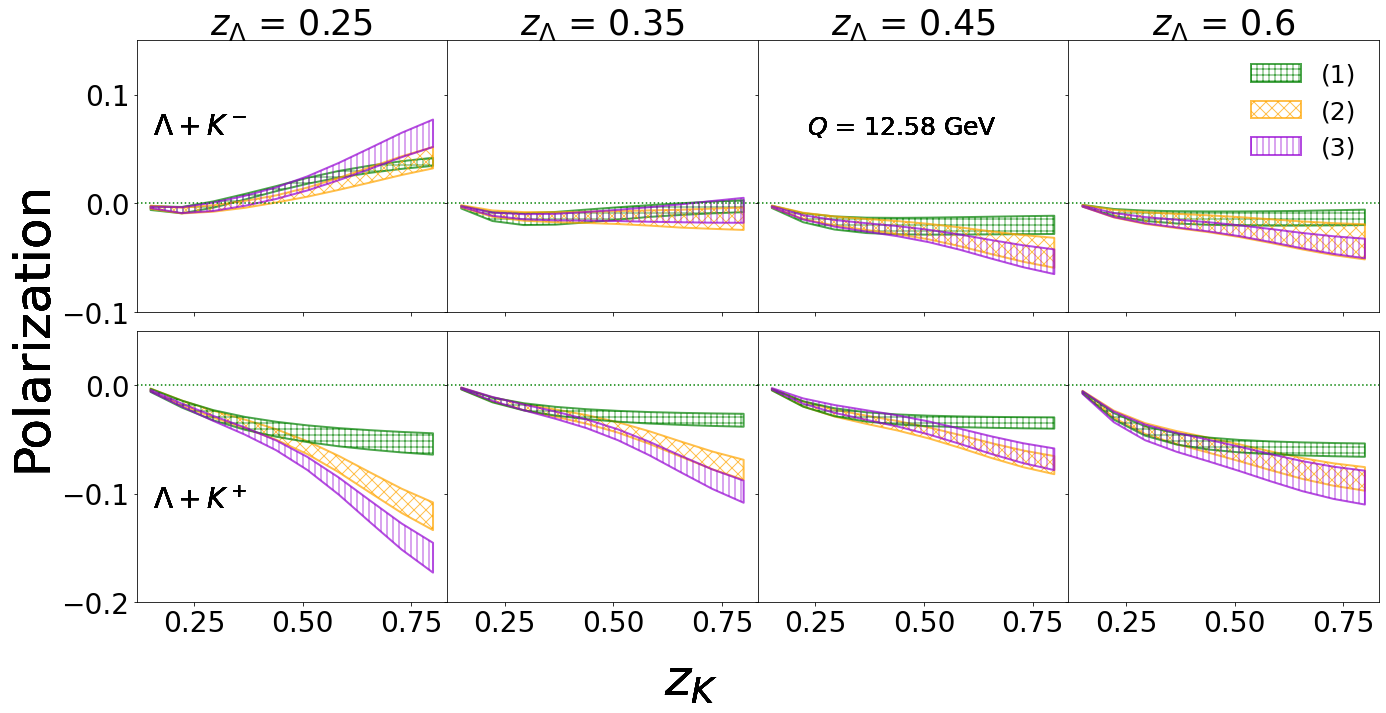

In [7]:
scale=12.58
z1=[0.25,0.35,0.45,0.6,0.25,0.35,0.45,0.6]
#z1=[0.35,0.45,0.6,0.35,0.45,0.6]
dati_lk1=pd.read_csv('fit_parameters/bands_/dati_lk_su_charm_no_no_scale_'+str(scale)+'_def.csv')
#
dati_lk2=pd.read_csv('fit_parameters/bands_/dati_lk_su_charm_no_yes_scale_'+str(scale)+'_def.csv')
#
dati_lk3=pd.read_csv('fit_parameters/bands_/dati_lk_su_charm_yes_yes_scale_'+str(scale)+'_def.csv')

lim1=[-0.1,0.15]
lim2=[-0.2,0.05]

ct=1
fig, axes = plt.subplots(1,8)
for zs,ax in zip(z1,axes):

    #fig.suptitle('$\Lambda$ - $\pi^+$ -- coef = '+str(coef)+' $\chi^2_{dof}$ = '+str(chi),fontsize=30)	
    dt1 = dati_lk1.loc[(dati_lk1['had1']==300) & (dati_lk1['z1']==zs)& (dati_lk1['had2']==200)]
    dt12 = dati_lk1.loc[(dati_lk1['had1']==300) & (dati_lk1['z1']==zs)& (dati_lk1['had2']==205)]

    dt2 = dati_lk2.loc[(dati_lk2['had1']==300) & (dati_lk2['z1']==zs)& (dati_lk2['had2']==200)]
    dt22 = dati_lk2.loc[(dati_lk2['had1']==300) & (dati_lk2['z1']==zs)& (dati_lk2['had2']==205)]

    dt3 = dati_lk3.loc[(dati_lk3['had1']==300) & (dati_lk3['z1']==zs)& (dati_lk3['had2']==200)]
    dt32 = dati_lk3.loc[(dati_lk3['had1']==300) & (dati_lk3['z1']==zs)& (dati_lk3['had2']==205)]

    #pnt = dati_exp.loc[(dati_exp['h1']==300) & (dati_exp['z1']==zs)& (dati_exp['h2']==200)]	
    #pnt_white = undati_exp.loc[(undati_exp['h1']==300) & (undati_exp['z1']==zs)& (undati_exp['h2']==100)]	
    #pnt2 = dati_exp.loc[(dati_exp['h1']==300) & (dati_exp['z1']==zs)& (dati_exp['h2']==205)]	

    if ct<=4:
        ax=plt.subplot(2,4,ct)
        ### new fit lines
        #ax.plot(dt12.z2,dt12.conv,label='_(1) $\Lambda$ $K^-$ ',linewidth=fit_l,color='red')
        #ax.plot(dt1.z2,dt1.conv,label='_(1) $\Lambda$ $K^+$ ',linewidth=fit_l,linestyle='-.',color='red')
        ax.fill_between(dt12.z2,dt12.maxx,dt12.mins,label='(1)',linewidth=fit_l,color="none",hatch="++",edgecolor="green", alpha=0.7)
        ax.fill_between(dt12.z2,dt22.maxx,dt22.mins,label='(2)',linewidth=fit_l,color="none",hatch="xx",edgecolor="orange", alpha=0.7)
        ax.fill_between(dt12.z2,dt32.maxx,dt32.mins,label='(3)',linewidth=fit_l,color="none",hatch="||",edgecolor="darkviolet", alpha=0.7)

        if zs == 0.25: title("$z_{\Lambda}$ = "+str(zs),fontsize=title_s,x=0.5, y=1)
        if zs == 0.35: title("$z_{\Lambda}$ = "+str(zs),fontsize=title_s,x=0.5, y=1)
        if zs == 0.45: title("$z_{\Lambda}$ = "+str(zs),fontsize=title_s,x=0.5, y=1)
        if zs == 0.6: title("$z_{\Lambda}$ = "+str(zs),fontsize=title_s,x=0.5, y=1)
        axhline(linewidth=1.5, ls=':', color='g')
        ax.tick_params(axis='both', which='major', labelsize=28)
        ax.set_xticklabels([])
        if ct ==2 : ax.set_yticklabels([])
        if ct ==3 : ax.set_yticklabels([])
        if ct ==4 : ax.set_yticklabels([])
        if ct ==4 :legend(loc='upper right',bbox_to_anchor=(1.,1), fontsize=25,frameon=False), 
        #if ct ==len(z1) :legend(loc='upper right',bbox_to_anchor=(1.,0.9), fontsize=25,frameon=False), 
        #if ct==1:ylabel('Polarization',size=y_lbl) 
        ax.set_ylim(lim1)

    elif ct>4:
        #ax.plot(dt22.z2,dt22.conv,label='_(2) $\Lambda$ $K^-$ ',linewidth=fit_l,color='orange')
        #ax.plot(dt2.z2,dt2.conv,label='_(2) $\Lambda$ $K^+$ ',linewidth=fit_l,linestyle='-.',color='orange')
        ax=plt.subplot(2,4,ct)

        ax.fill_between(dt1.z2,dt2.maxx,dt2.mins,linewidth=fit_l,color="none",hatch="xx",edgecolor="orange", alpha=0.7)
        ax.fill_between(dt1.z2,dt1.maxx,dt1.mins,color="none",linewidth=fit_l,hatch="++",edgecolor="green", alpha=.7)
        ax.fill_between(dt1.z2,dt3.maxx,dt3.mins,linewidth=fit_l,color="none",hatch="||",edgecolor="darkviolet", alpha=0.7)
    
    #ax.plot(dt12.z2,dt32.conv,label='_(3) $\Lambda$ $K^-$ ',linewidth=fit_l,color='brown')
    #ax.plot(dt1.z2,dt3.conv,label='_(3) $\Lambda$ $K^+$ ',linewidth=fit_l,linestyle='-.',color='brown')

        axhline(linewidth=1.5, ls=':', color='g')
    ### experimental points with error bars

        ax.tick_params(axis='both', which='major', labelsize=28)
        if ct >5: ax.set_yticklabels([])

    #if ct ==len(z1) :legend(loc='upper right',bbox_to_anchor=(1.,0.9), fontsize=25,frameon=False), 
        #if ct==1:ylabel('Polarization',size=y_lbl) 
        ax.set_ylim(lim2)
    ct+=1
    fig.text(0.5, 0.1, r'$z_{K}$', ha='center',size=x_lbl)
    #fig.text(0.15, 0.25, '(c)', ha='center',size=x_lbl)
    fig.text(0.65, 0.7, '$Q$ = '+str(scale)+' GeV', ha='center',size=25)
    fig.text(0.03, 0.35, 'Polarization',rotation=90, ha='center',size=y_lbl)
    fig.text(0.15, 0.7, '$\Lambda + K^-$', ha='center',size=28)
    fig.text(0.15, 0.3, '$\Lambda + K^+$', ha='center',size=28)

fig.subplots_adjust(top=0.8,bottom=0.2,left=0.105,right=0.99,hspace=0.07,wspace=0.0)
fig.set_size_inches(19.5, 13, forward=True)
#fig.savefig('Lb_k.pdf')
#fig.savefig('Lb_k.png')
#fig.savefig('plot_scale/Lb_k_scale_'+str(scale)+'_bands.png')
#fig.savefig('plot_draft/Lb_k_scale_'+str(scale)+'_2_bands.pdf')
#fig.savefig('plot_draft/Lb_k_scale_'+str(scale)+'_2_bands.png')

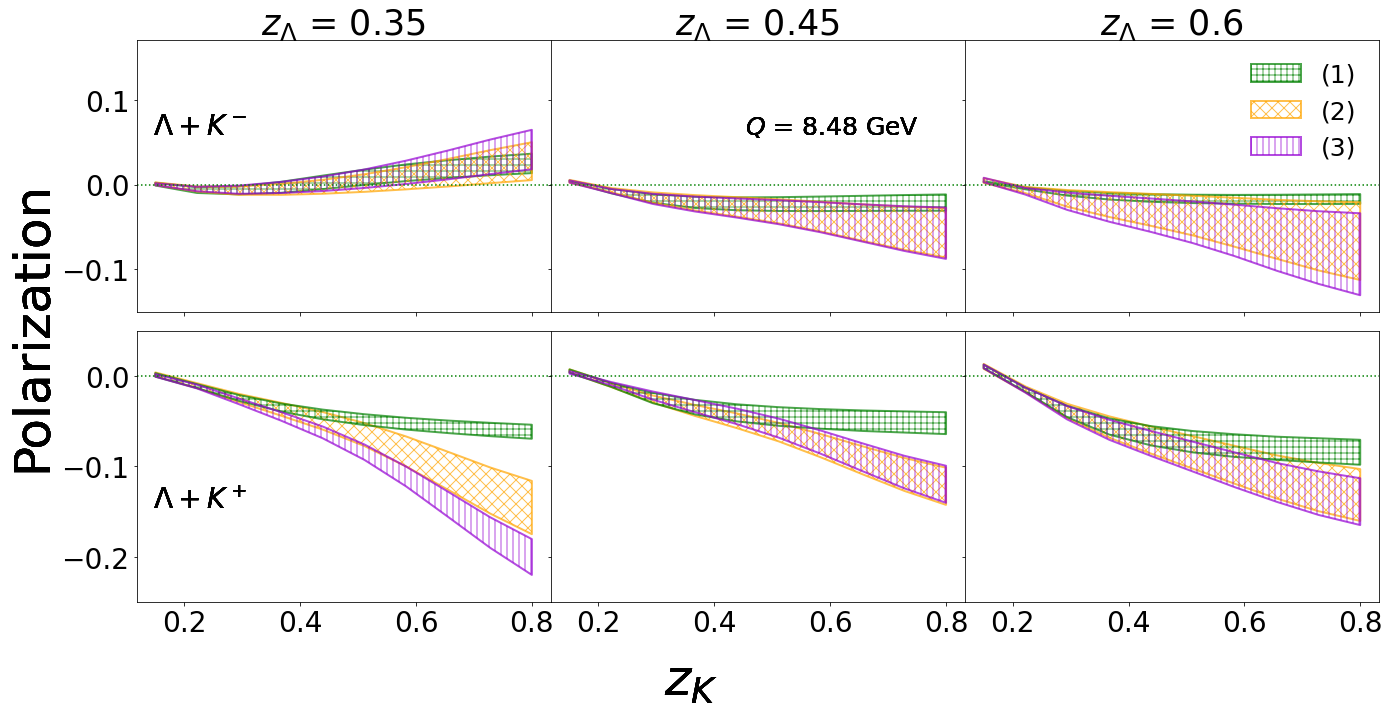

In [97]:
scale=8.48
#z1=[0.25,0.35,0.45,0.6,0.25,0.35,0.45,0.6]
z1=[0.35,0.45,0.6,0.35,0.45,0.6]
dati_lk1=pd.read_csv('fit_parameters/bands_/dati_lk_su_charm_no_no_scale_'+str(scale)+'_def.csv')
#
dati_lk2=pd.read_csv('fit_parameters/bands_/dati_lk_su_charm_no_yes_scale_'+str(scale)+'_def.csv')
#
dati_lk3=pd.read_csv('fit_parameters/bands_/dati_lk_su_charm_yes_yes_scale_'+str(scale)+'_def.csv')

lim1=[-0.15,0.17]
lim2=[-0.25,0.05]

ct=1
fig, axes = plt.subplots(1,6)
for zs,ax in zip(z1,axes):

    #fig.suptitle('$\Lambda$ - $\pi^+$ -- coef = '+str(coef)+' $\chi^2_{dof}$ = '+str(chi),fontsize=30)	
    dt1 = dati_lk1.loc[(dati_lk1['had1']==300) & (dati_lk1['z1']==zs)& (dati_lk1['had2']==200)]
    dt12 = dati_lk1.loc[(dati_lk1['had1']==300) & (dati_lk1['z1']==zs)& (dati_lk1['had2']==205)]

    dt2 = dati_lk2.loc[(dati_lk2['had1']==300) & (dati_lk2['z1']==zs)& (dati_lk2['had2']==200)]
    dt22 = dati_lk2.loc[(dati_lk2['had1']==300) & (dati_lk2['z1']==zs)& (dati_lk2['had2']==205)]

    dt3 = dati_lk3.loc[(dati_lk3['had1']==300) & (dati_lk3['z1']==zs)& (dati_lk3['had2']==200)]
    dt32 = dati_lk3.loc[(dati_lk3['had1']==300) & (dati_lk3['z1']==zs)& (dati_lk3['had2']==205)]

    pnt = dati_exp.loc[(dati_exp['h1']==300) & (dati_exp['z1']==zs)& (dati_exp['h2']==200)]	
    #pnt_white = undati_exp.loc[(undati_exp['h1']==300) & (undati_exp['z1']==zs)& (undati_exp['h2']==100)]	
    pnt2 = dati_exp.loc[(dati_exp['h1']==300) & (dati_exp['z1']==zs)& (dati_exp['h2']==205)]	

    if ct<=3:
        ax=plt.subplot(2,3,ct)
        ### new fit lines
        #ax.plot(dt12.z2,dt12.conv,label='_(1) $\Lambda$ $K^-$ ',linewidth=fit_l,color='red')
        #ax.plot(dt1.z2,dt1.conv,label='_(1) $\Lambda$ $K^+$ ',linewidth=fit_l,linestyle='-.',color='red')
        ax.fill_between(dt12.z2,dt12.maxx,dt12.mins,label='(1)',linewidth=fit_l,color="none",hatch="++",edgecolor="green", alpha=0.7)
        ax.fill_between(dt12.z2,dt22.maxx,dt22.mins,label='(2)',linewidth=fit_l,color="none",hatch="xx",edgecolor="orange", alpha=0.7)
        ax.fill_between(dt12.z2,dt32.maxx,dt32.mins,label='(3)',linewidth=fit_l,color="none",hatch="||",edgecolor="darkviolet", alpha=0.7)

        if zs == 0.25: title("$z_{\Lambda}$ = "+str(zs),fontsize=title_s,x=0.5, y=1)
        if zs == 0.35: title("$z_{\Lambda}$ = "+str(zs),fontsize=title_s,x=0.5, y=1)
        if zs == 0.45: title("$z_{\Lambda}$ = "+str(zs),fontsize=title_s,x=0.5, y=1)
        if zs == 0.6: title("$z_{\Lambda}$ = "+str(zs),fontsize=title_s,x=0.5, y=1)
        axhline(linewidth=1.5, ls=':', color='g')
        ax.tick_params(axis='both', which='major', labelsize=28)
        ax.set_xticklabels([])
        if ct ==2 : ax.set_yticklabels([])
        if ct ==3 : ax.set_yticklabels([])
        if ct ==4 : ax.set_yticklabels([])
        if ct ==3 :legend(loc='upper right',bbox_to_anchor=(1.,1.), fontsize=25,frameon=False), 
        #if ct ==len(z1) :legend(loc='upper right',bbox_to_anchor=(1.,0.9), fontsize=25,frameon=False), 
        #if ct==1:ylabel('Polarization',size=y_lbl) 
        ax.set_ylim(lim1)

    elif ct>3:
        #ax.plot(dt22.z2,dt22.conv,label='_(2) $\Lambda$ $K^-$ ',linewidth=fit_l,color='orange')
        #ax.plot(dt2.z2,dt2.conv,label='_(2) $\Lambda$ $K^+$ ',linewidth=fit_l,linestyle='-.',color='orange')
        ax=plt.subplot(2,3,ct)

        ax.fill_between(dt1.z2,dt2.maxx,dt2.mins,linewidth=fit_l,color="none",hatch="xx",edgecolor="orange", alpha=0.7)
        ax.fill_between(dt1.z2,dt1.maxx,dt1.mins,color="none",linewidth=fit_l,hatch="++",edgecolor="green", alpha=0.7)
        ax.fill_between(dt1.z2,dt3.maxx,dt3.mins,linewidth=fit_l,color="none",hatch="||",edgecolor="darkviolet", alpha=0.7)
    
    #ax.plot(dt12.z2,dt32.conv,label='_(3) $\Lambda$ $K^-$ ',linewidth=fit_l,color='brown')
    #ax.plot(dt1.z2,dt3.conv,label='_(3) $\Lambda$ $K^+$ ',linewidth=fit_l,linestyle='-.',color='brown')

        axhline(linewidth=1.5, ls=':', color='g')
    ### experimental points with error bars

        ax.tick_params(axis='both', which='major', labelsize=28)
        if ct >4: ax.set_yticklabels([])

    #if ct ==len(z1) :legend(loc='upper right',bbox_to_anchor=(1.,0.9), fontsize=25,frameon=False), 
        #if ct==1:ylabel('Polarization',size=y_lbl) 
        ax.set_ylim(lim2)
    ct+=1
    fig.text(0.5, 0.1, r'$z_{K}$', ha='center',size=x_lbl)
    #fig.text(0.15, 0.25, '(c)', ha='center',size=x_lbl)
    fig.text(0.6, 0.7, '$Q$ = '+str(scale)+' GeV', ha='center',size=25)
    fig.text(0.03, 0.35, 'Polarization',rotation=90, ha='center',size=y_lbl)
    fig.text(0.15, 0.7, '$\Lambda + K^-$', ha='center',size=28)
    fig.text(0.15, 0.3, '$\Lambda + K^+$', ha='center',size=28)

fig.subplots_adjust(top=0.8,bottom=0.2,left=0.105,right=0.99,hspace=0.07,wspace=0.0)
fig.set_size_inches(19.5, 13, forward=True)
#fig.savefig('Lb_k.pdf')
#fig.savefig('Lb_k.png')
#fig.savefig('plot_scale/Lb_k_scale_'+str(scale)+'_bands.png')
#fig.savefig('plot_draft/Lb_k_scale_'+str(scale)+'_2_bands.pdf')
#fig.savefig('plot_draft/Lb_k_scale_'+str(scale)+'_2_bands.png')